In [26]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
import pandas as pd

In [27]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = list(zip(x, y))
print(coordinates)

[(25.12903645, -67.59741259), (25.92017388, 11.09532135), (26.62509167, 74.84233102), (-59.98969384, -76.89176677), (37.30571269, -61.13376282)]


In [28]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [29]:
# Add the latitudes and longitudes to a list.
#coordinates = list(coordinates)
#print(coordinates)

In [30]:
 #Use the tuple() function to display the latitude and longitude combinations.
cities = []
for coordinate in coordinates:
    # we get the city name using the citipy library, by giving it coordinates
    city_name = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # we get the city code using the citipy library, by giving it coordinates
    city_code = citipy.nearest_city(coordinate[0], coordinate[1]).country_code
    # then we addd the city name to our cities list
    
    if city_name not in cities: 
        cities.append(city_name)
        
    print(city_name, city_code)

cockburn town tc
gat ly
parvatsar in
punta arenas cl
saint george bm


In [31]:
cities

['cockburn town', 'gat', 'parvatsar', 'punta arenas', 'saint george']

In [32]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [33]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ecdee2595a5904e5ba1f04e6b215029e


In [34]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ecdee2595a5904e5ba1f04e6b215029e&q=Boston


In [35]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [36]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [37]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04d"}],"base":"stations","main":{"temp":83.19,"feels_like":84.7,"temp_min":78.3,"temp_max":88.63,"pressure":1007,"humidity":53},"visibility":10000,"wind":{"speed":10,"deg":38,"gust":23},"clouds":{"all":90},"dt":1621798006,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1621761337,"sunset":1621814804},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [38]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 83.19,
  'feels_like': 84.7,
  'temp_min': 78.3,
  'temp_max': 88.63,
  'pressure': 1007,
  'humidity': 53},
 'visibility': 10000,
 'wind': {'speed': 10, 'deg': 38, 'gust': 23},
 'clouds': {'all': 90},
 'dt': 1621798006,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1621761337,
  'sunset': 1621814804},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [39]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [40]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.json():
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [41]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 83.19,
  'feels_like': 84.7,
  'temp_min': 78.3,
  'temp_max': 88.63,
  'pressure': 1007,
  'humidity': 53},
 'visibility': 10000,
 'wind': {'speed': 10, 'deg': 38, 'gust': 23},
 'clouds': {'all': 90},
 'dt': 1621798006,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1621761337,
  'sunset': 1621814804},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [42]:
# Get the JSON data.
boston_data = city_weather.json()

In [43]:
boston_data['sys']['country']

'US'

In [44]:
boston_data["dt"]

1621798006

In [45]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 88.63 53 90 10


In [46]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-05-23 19:26:46'

In [47]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [48]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    
    

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cockburn town
Processing Record 2 of Set 1 | gat
Processing Record 3 of Set 1 | parvatsar
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | saint george
-----------------------------
Data Retrieval Complete      
-----------------------------


In [49]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cockburn Town,21.4612,-71.1419,78.26,76,7,16.78,TC,2021-05-23 19:26:47
1,Gat,31.6100,34.7642,70.48,75,6,5.06,IL,2021-05-23 19:25:01
2,Parvatsar,26.8833,74.7667,84.16,36,12,3.22,IN,2021-05-23 19:26:47
3,Punta Arenas,-53.1500,-70.9167,41.11,88,90,12.59,CL,2021-05-23 19:26:48
4,Saint George,37.1041,-113.5841,75.67,20,1,1.99,US,2021-05-23 19:25:17


In [50]:
# Create the output file (CSV).
output_data_file = "cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [52]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [54]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%X")
today

'15:35:59'

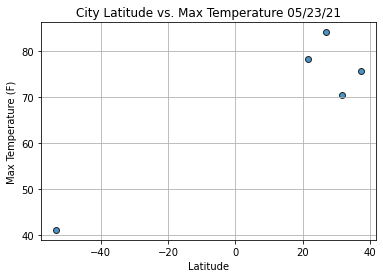

In [60]:
# Import time module
import time
import matplotlib.pyplot as plt

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
#plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

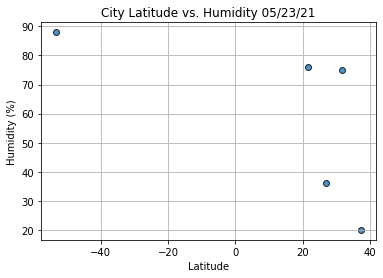

In [62]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
#plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

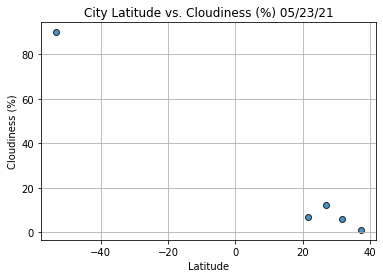

In [64]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
#plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()